In [1]:
import networkx as nx
import numpy as np
from infomap import Infomap
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph([
    (1, 2),
    (2, 3),
    (3, 1),
    (3, 4),
    (4, 5),
    (4, 6),
    (5, 6),
    (5, 7),
    (6, 7)
])

In [3]:
metadata = {
    1: 1,
    2: 1,
    3: 2,
    4: 1,
    5: 2,
    6: 2,
    7: 2
}

nx.set_node_attributes(G, metadata, "metadata")

In [4]:
def draw(G, square_color=None, circle_color=None):
    pos = nx.spring_layout(G)
    nx.draw_networkx_edges(G, pos)
    squares = [node for node, meta in G.nodes.data("metadata") if meta == 1]
    circles = [node for node, meta in G.nodes.data("metadata") if meta == 2]

    nx.draw_networkx_nodes(G, pos, nodelist=squares, node_shape="s", node_color=square_color)
    nx.draw_networkx_nodes(G, pos, nodelist=circles, node_shape="o", node_color=circle_color)

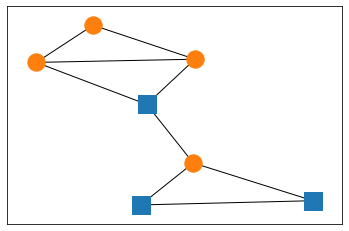

In [5]:
draw(G)

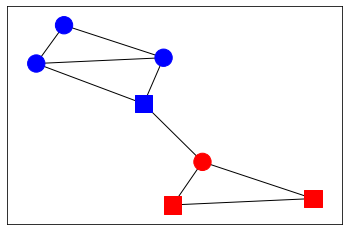

In [6]:
# Without metadata

im = Infomap(directed=False, silent=True, num_trials=1)
im.add_networkx_graph(G)
im.run()

nx.set_node_attributes(G, im.get_modules(), "module")

square_color = ["blue" if data["module"] == 1 else "red" for _, data in G.nodes.data(True) if data["metadata"] == 1]
circle_color = ["blue" if data["module"] == 1 else "red" for _, data in G.nodes.data(True) if data["metadata"] == 2]

draw(G, square_color, circle_color)

In [7]:
# With metadata

H = nx.DiGraph()
for source, target in G.edges:
    H.add_edge(source, target)
    H.add_edge(target, source)

nx.write_edgelist(H, "fig0.net", data=False)

with open("fig0-meta.txt", "w") as fp:
    for node, meta in G.nodes.data("metadata"):
        fp.write(f"{node} {meta}\n")

In [8]:
!simulate/target/release/simulate -c fig0.net fig0-meta.txt fig0-meta.net 0.0 1.0 100000

{1: 2, 2: 2, 3: 1, 4: 2, 5: 1, 6: 1, 7: 1}


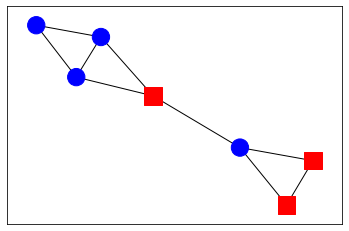

In [14]:
p_diff = [0.09]

for p in p_diff:
    !simulate/target/release/simulate -c fig0.net fig0-meta.txt fig0-meta.net 1.0 {p} 1000000
    im = Infomap(flow_model="rawdir", silent=True, num_trials=10)
    im.read_file("fig0-meta.net")
    im.run()

    print(im.get_modules())
    nx.set_node_attributes(G, im.get_modules(), "module")

    square_color = ["blue" if data["module"] == 1 else "red" for _, data in G.nodes.data(True) if data["metadata"] == 1]
    circle_color = ["blue" if data["module"] == 1 else "red" for _, data in G.nodes.data(True) if data["metadata"] == 2]

    plt.clf()
    plt.gca()
    draw(G, square_color, circle_color)
    plt.savefig(f"{p}.png")